In [5]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

%matplotlib inline

In [12]:
cdata = pd.read_csv ("auto-mpg.csv")

In [13]:
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
cdata.shape

(398, 9)

In [15]:
cdata.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1      

 changine origin integer to country 

In [17]:
cdata['origin'] = cdata['origin'].replace({1:'america',2:'europe',3:'asia'})

drop car name 

In [19]:
cdata=cdata.drop('car name',axis=1)

In [20]:
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [21]:
## cehck null values
cdata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [31]:
cdata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

## Data cleaning is necessary for this data 

In [32]:
## horspower data suppose to be integer but showing as object so need to clean the data 
hpIsDigit=pd.DataFrame(cdata.horsepower.str.isdigit())

In [33]:
cdata[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [34]:
cdata=cdata.replace('?',np.nan)
cdata[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [28]:
cdata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [35]:
cdata['horsepower'].median()

93.5

In [36]:
## now fill missing values with median values in horsepower column
cdata['horsepower']=cdata['horsepower'].fillna(cdata['horsepower'].median())

In [44]:
## check if it is done properly
cdata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [45]:
cdata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [46]:
cdata['horsepower']=cdata['horsepower'].astype('float64')

In [47]:
cdata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [48]:
## create dummy variable of origin
cdata = pd.get_dummies(cdata,['origin'])

In [49]:
cdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


## Now start analysis using bivariate plots 

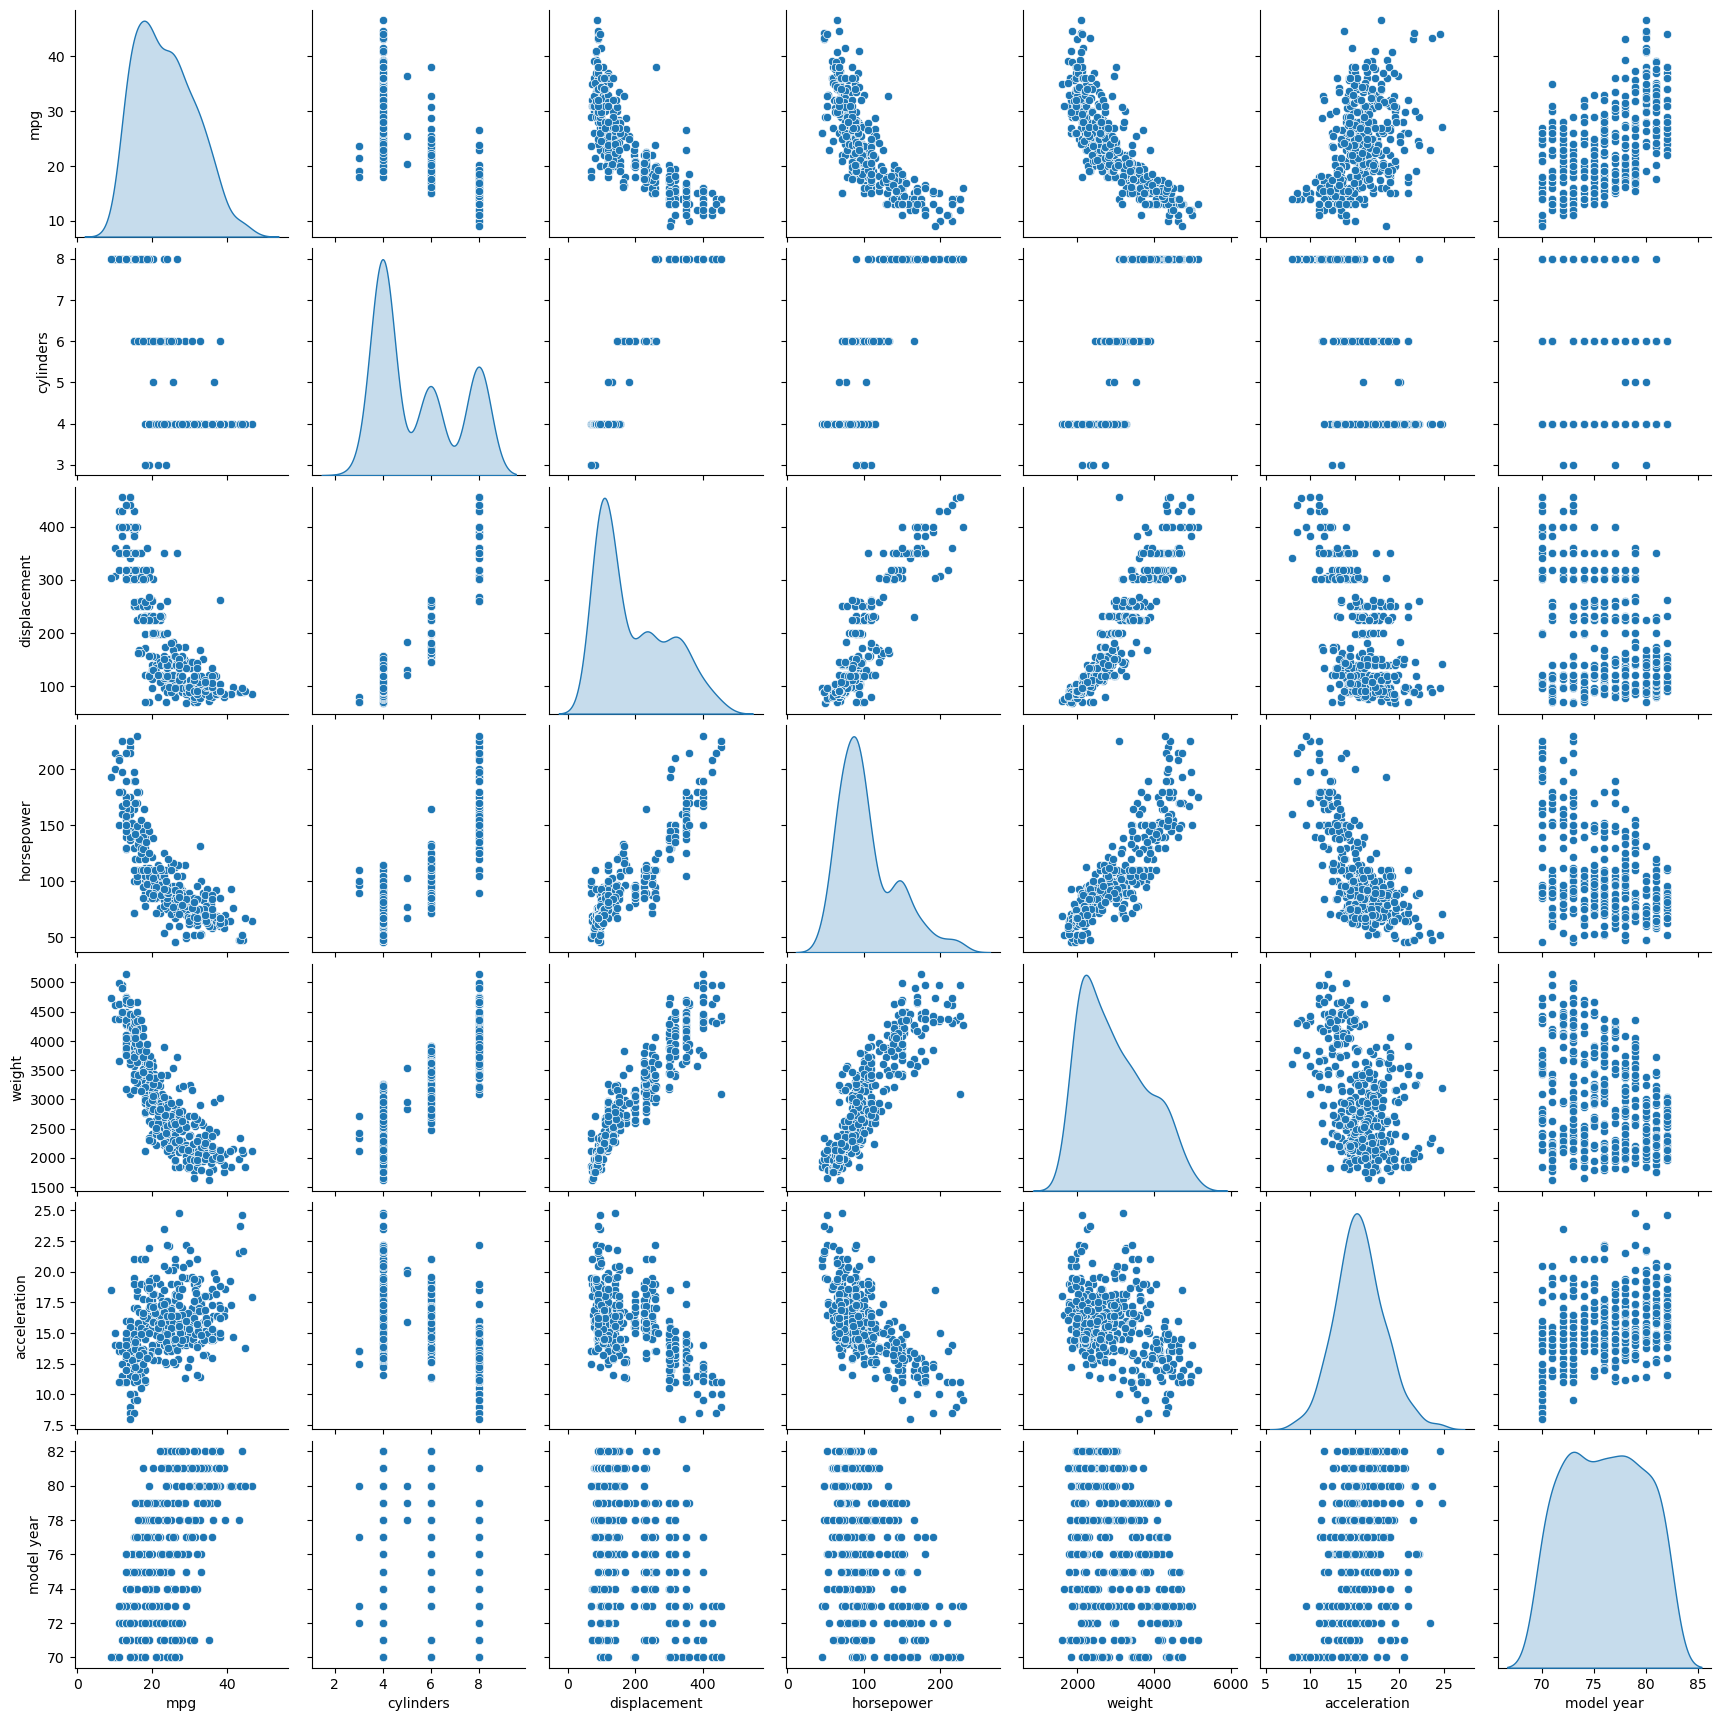

In [50]:
cdata_attr=cdata.iloc[:,0:7]
sns.pairplot(cdata_attr,diag_kind='kde')

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

In [51]:
y=cdata['mpg']
X=cdata.drop('mpg',axis=1)

In [52]:
## perform data splitting 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [54]:
## fit linear regression
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [55]:
## Here are the coefficients for each variable and the intercept
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cylinders is -0.3948079661648294
The coefficient for displacement is 0.028945510765487566
The coefficient for horsepower is -0.02175220772354731
The coefficient for weight is -0.007352032065147359
The coefficient for acceleration is 0.061919366007618944
The coefficient for model year is 0.8369338917645004
The coefficient for origin_america is -1.7988493458374308
The coefficient for origin_asia is 0.596415690756345
The coefficient for origin_europe is 1.2024336550810857


In [56]:
regression_model.intercept_

-19.485884771453204

In [57]:
regression_model.predict(X_test)

array([20.91554528, 27.78619415, 20.35450492, 26.7530043 , 24.34440311,
       15.94627895, 29.61711144, 34.54999717, 17.08487642, 10.56570744,
       30.27190054, 16.46101954, 22.34949158, 27.36817515, 36.4916326 ,
       23.52414572, 10.95688403, 20.15994355,  9.06847316, 33.03329847,
       25.97760019, 32.32715763, 20.84295791, 25.08512814, 25.67024575,
       30.00444827, 32.58061387, 32.5462297 , 15.1314045 , 30.17173763,
       27.18513498, 11.04447745, 21.28330056, 28.68243423, 24.88266353,
       13.63888896, 26.37838591,  9.21013918, 31.6904227 , 23.85386165,
       23.89949396, 24.41984635, 21.05348912, 34.13688229, 25.91853825,
       22.15815042, 21.15554401, 11.6783042 , 28.50708814, 19.00196555,
       24.24819425, 26.62821232, 17.07117894, 12.10403757, 28.34022188,
       24.82823055, 10.32835574, 13.09624022, 30.49807412, 35.81856922,
       36.58585421, 35.86191278, 17.92313015, 27.49879047, 20.67007774,
       33.42297856, 26.59143064, 26.57457423, 29.67371196, 12.34

In [59]:
regression_model.score(X_test,y_test)*100

84.33135132808829

In [60]:
from sklearn import metrics

prediction = regression_model.predict(X_test)

metrics.mean_absolute_error(y_test,prediction)

2.3542812072204016

In [61]:
MAE = metrics.mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MAE)
RMSE

1.5343667121064644